## Breast Tumor Classifier

### Author: Brindha Ganesan

## Introduction

The primary objective of this project is to harness machine learning techniques for the classification of breast tumours as benign or malignant using histopathological images. 

This notebook contains an introduction to the dataset, including data quality concerns and findings from preliminary EDA.

## Table of Contents

[1. Data Source](#Data-Source) <br>


[2. Loading Data](#Loading-Data) <br>

[3. Exploratory Data Analysis](#Exploratory-Data-Analysis) <br>



## Data Source

#### A Dataset for Breast Cancer Histopathological Image Classification

#### Breast Cancer Histopathological Database

[BreaKHis – Breast Cancer Histopathological Database](https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/) by [Spanhol, F., Oliveira, L. S., Petitjean, C. and Heutte, L.](https://ieeexplore.ieee.org/document/7312934) is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

The Breast Cancer Histopathological Image Classification (BreakHis) is composed of images of breast tumor tissue collected from 82 patients using different magnifying factors (40X, 100X, 200X, and 400X). To date, it contains 2,480 benign and 5,429 malignant samples (700X460 pixels, 3-channel RGB, 8-bit depth in each channel, PNG format). 

#### Characteristics

The BreaKHis dataset is divided into two main groups: benign tumors and malignant tumors.In current version, samples present in dataset were collected by SOB method, also named partial mastectomy or excisional biopsy. This type of procedure, compared to any methods of needle biopsy, removes the larger size of tissue sample and is done in a hospital with general anesthetic.

The BreaKHis 1.0 is structured as follows:

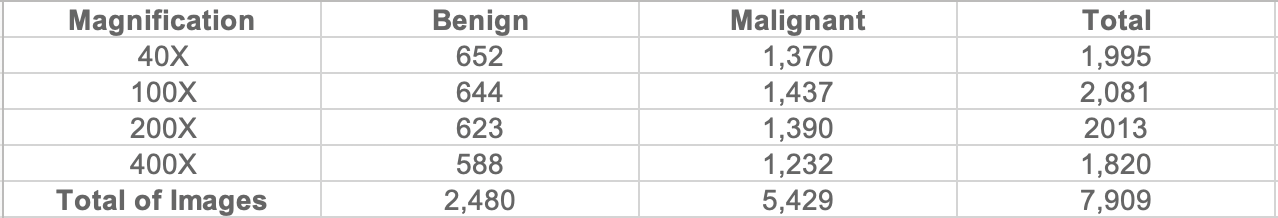




In [1]:
# pip install opencv-python

# import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

import os
import glob

## Loading Data

In [2]:
# Data

breakhis = {
    'Magnification': ['40X', '100X', '200X', '400X'],
    'Benign': [652,644,623, 588],
    'Malignant': [1370, 1437, 1390, 1232]
}

In [3]:
# Load the data into a dataframe

breakhis = pd.DataFrame(breakhis)
breakhis

,Magnification,Benign,Malignant
0,40X,652,1370
1,100X,644,1437
2,200X,623,1390
3,400X,588,1232


Now let us Visualize the counts of benign and malignant cases for each magnification level in a bar chart. 

In [4]:
# Set the index to Magnification column
breakhis.set_index('Magnification', inplace=True)

In [5]:
breakhis

,Benign,Malignant
Magnification,,
40X,652,1370
100X,644,1437
200X,623,1390
400X,588,1232


In [6]:
breakhis[['Benign', 'Malignant']]

,Benign,Malignant
Magnification,,
40X,652,1370
100X,644,1437
200X,623,1390
400X,588,1232


## Exploratory Data Analysis

<Figure size 1000x600 with 0 Axes>

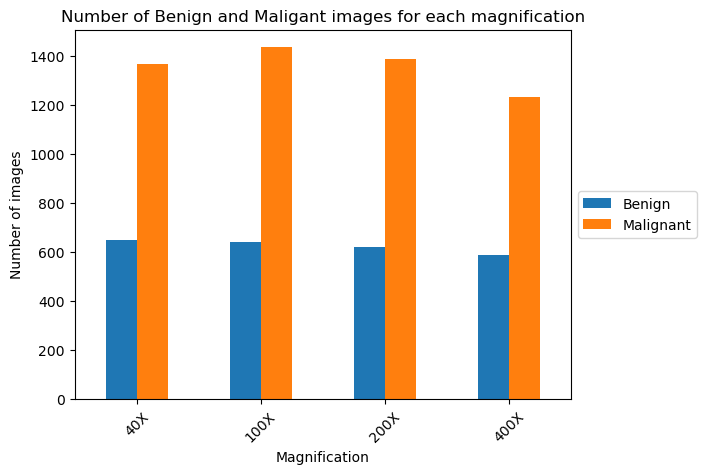

In [7]:
# Benign and Maligant images for each magnification

# Adjusting figure size
plt.figure(figsize=(10, 6))

# Plotting
breakhis.plot(kind='bar', stacked=False)

# Placing the legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Number of Benign and Maligant images for each magnification')
plt.xlabel('Magnification')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Benign and Maligant images in total

# Data
breakhis_total = {
    'Benign Images': 2480,
    'Malignant Images': 5429
}

# Convert the dictionary into a pandas DataFrame
breakhis_total = pd.DataFrame.from_dict(breakhis_total, orient='index', columns=['Total'])
breakhis_total



,Total
Benign Images,2480
Malignant Images,5429


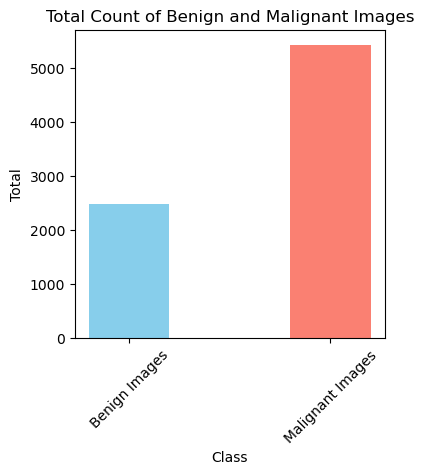

In [17]:
# Visualize the data
plt.figure(figsize=(4,4))
plt.bar(breakhis_total.index, breakhis_total['Total'], color=['skyblue', 'salmon'], width = 0.4)
plt.title('Total Count of Benign and Malignant Images')
plt.xlabel('Class')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- There are 2480 images classified as benign. In medical contexts, "benign" typically refers to conditions or tumors that are not harmful or cancerous.

- There are 5429 images classified as malignant. In medical contexts, "malignant" typically refers to conditions or tumors that are cancerous or harmful.

#### Class imbalance

-  The majority of the images (5429) are classified as malignant (cancerous), while a smaller portion (2480) are classified as benign (non-cancerous).

- This type of data distribution indicates a class imbalance, with the "Malignant Images" class being the majority class and the "Benign Images" class being the minority class. Class imbalance can pose challenges in machine learning tasks, and special attention should be paid to ensure that the model does not become biased towards the majority class and performs well on both classes. Techniques such as data augmentation, resampling, or using specialized loss functions can be employed to address class imbalance during model training.



Now, let's compare images in terms of the distribution of pixel sizes to assess malignancy or benignity. Let's take one benign and one malignant image.

In [18]:
# Loading images in grayscale 
benign_image = cv2.imread('/Users/brindhamanivannan/Documents/BrainStation/Capstone/BreaKHis/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/40X/SOB_B_F-14-9133-40-001.png', cv2.IMREAD_GRAYSCALE)
benign_image

array([[229, 227, 214, ..., 197, 186, 178],
       [220, 221, 207, ..., 198, 192, 182],
       [213, 212, 201, ..., 205, 198, 189],
       ...,
       [194, 186, 184, ..., 176, 180, 192],
       [193, 189, 184, ..., 174, 180, 192],
       [190, 186, 188, ..., 178, 186, 197]], dtype=uint8)

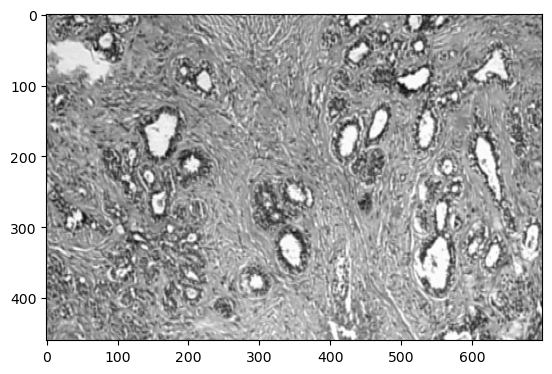

In [19]:
plt.imshow(benign_image, cmap='gray')

In [20]:
# Loading images in grayscale 
malignant_image = cv2.imread('/Users/brindhamanivannan/Documents/BrainStation/Capstone/BreaKHis/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-2523/40X/SOB_M_DC-14-2523-40-010.png', cv2.IMREAD_GRAYSCALE)
malignant_image

array([[160, 158, 154, ..., 156, 144, 126],
       [163, 170, 171, ..., 150, 133, 122],
       [165, 167, 169, ..., 150, 134, 118],
       ...,
       [199, 197, 201, ..., 175, 173, 175],
       [194, 194, 204, ..., 173, 175, 179],
       [186, 189, 189, ..., 159, 162, 167]], dtype=uint8)

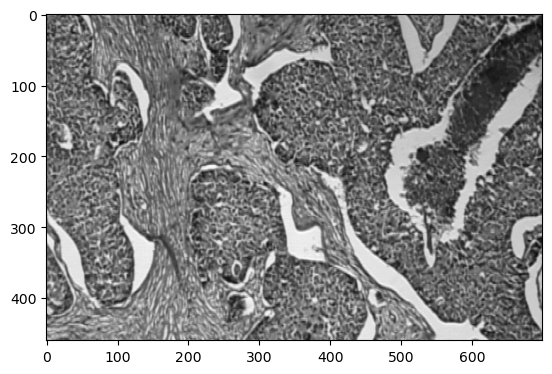

In [21]:
plt.imshow(malignant_image, cmap='gray')

In [22]:
# Flatten the images to 1D arrays
benign_pixels = benign_image.flatten()
benign_pixels

array([229, 227, 214, ..., 178, 186, 197], dtype=uint8)

In [23]:
malignant_pixels = malignant_image.flatten()
malignant_pixels

array([160, 158, 154, ..., 159, 162, 167], dtype=uint8)

Note:

Flattening images to 1D arrays simplifies data handling, facilitates analysis and visualization, and enables compatibility with various libraries and algorithms commonly used in image processing and computer vision tasks.

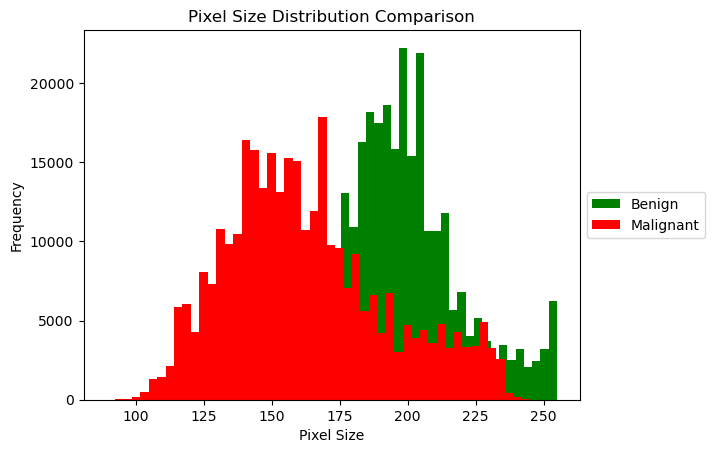

In [24]:
# Plot histograms of pixel sizes for each image
plt.hist(benign_pixels, bins=50, alpha=1.0, color='green', label='Benign')
plt.hist(malignant_pixels, bins=50, alpha=1.0, color='red', label='Malignant')

# Placing the legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding labels and title
plt.xlabel('Pixel Size')
plt.ylabel('Frequency')
plt.title('Pixel Size Distribution Comparison')

# Display the plot
plt.show()

With alpha set to 1.0 for both histograms, the colors specified by the color parameter will be more accurately represented, and we should see only the blue and red colors for the histograms.

Now let us take all benign and all malignant images and then plot the distribution of the pixel size, do we see the difference?

In [ ]:
def read_images_from_subfolders(root_folder, file_extensions=['png']):
    images = []
    print("Entered the function")
    print(root_folder)
    for ext in file_extensions:
        images.extend(glob.glob(os.path.join(root_folder, '**', f'*.{ext}'), recursive=True))
    return images

def run_image(root_folder):
    image_paths = read_images_from_subfolders(root_folder)
    images = []
    for img_path in image_paths:
        # Read image using OpenCV
        images = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    bulk_pixels = images.flatten()
    return bulk_pixels

benign_flattened_pixel = run_image('/Users/brindhamanivannan/Documents/BrainStation/Capstone/BreaKHis/BreaKHis_v1/histology_slides/breast/benign/')
malignant_flattened_pixel = run_image('/Users/brindhamanivannan/Documents/BrainStation/Capstone/BreaKHis/BreaKHis_v1/histology_slides/breast/malignant/')

print("benign_data")
print(benign_flattened_pixel)
print("malignant_data")
print(malignant_flattened_pixel)

In [ ]:
# Plot histograms of pixel sizes for each image
plt.hist(benign_flattened_pixel, bins=50, alpha=1.0, color='green', label='Benign')
plt.hist(malignant_flattened_pixel, bins=50, alpha=1.0, color='red', label='Malignant')

# Placing the legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding labels and title
plt.xlabel('Pixel Size')
plt.ylabel('Frequency')
plt.title('Pixel Size Distribution for all benign and malignant images')

# Display the plot
plt.show()